# Problem Statement

In the context of Rainfall Weather Forecasting, the primary objective is to develop predictive machine learning models to address two key tasks:

a) Rainfall Prediction: Design a predictive model that utilizes machine learning algorithms to forecast whether or not it will rain tomorrow based on historical weather data. This is a binary classification problem where the model will predict either "Yes" (rain) or "No" (no rain) for the "RainTomorrow" target variable.

b) Rainfall Amount Prediction: Design a predictive model that employs machine learning algorithms to predict the amount of rainfall (in millimeters) that could occur tomorrow based on historical weather data. This is a regression problem where the model will estimate the quantity of rainfall for the "Rainfall" target variable.

## Importing Neccessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [4]:
df=pd.read_csv('weatherAUS.csv')

In [5]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [6]:
df.shape

(8425, 23)

            The Dataset contains 8425 rows and 23 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

            The Dataset contains both Float and Object Data Types

In [8]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [9]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [10]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

                Large Number of Null Values are present and need to be Handled

### Removal of Null Values

In [11]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')

In [12]:
l=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [13]:
for i in l:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [14]:
imp2=SimpleImputer(missing_values=np.NaN,strategy='mean')

In [15]:
l2=['MinTemp','MaxTemp',  
 'Rainfall',     
 'Evaporation',    
 'Sunshine',   
 'WindGustSpeed',  
 'WindSpeed9am',  
 'WindSpeed3pm', 
 'Humidity9am',  
 'Humidity3pm',  
 'Pressure9am',   
 'Pressure3pm',   
 'Cloud9am', 
 'Cloud3pm',      
 'Temp9am' ,    
 'Temp3pm']

In [16]:
for i in l2:
    df[i]=imp2.fit_transform(df[i].values.reshape(-1,1))

In [17]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

        ***********All Null Values have been Handeled**************

### Exploratory Data Analysis

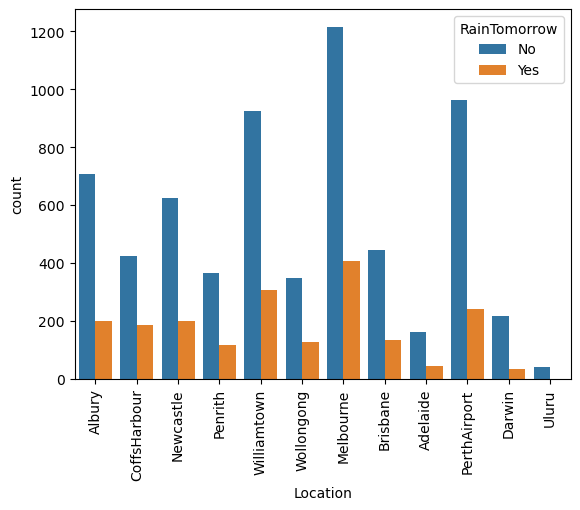

In [19]:
sns.countplot(x='Location', hue='RainTomorrow', data=df)
plt.xticks(rotation=90)
plt.show()

            As per Data Melbourne will have Maximum rain tomorrow 

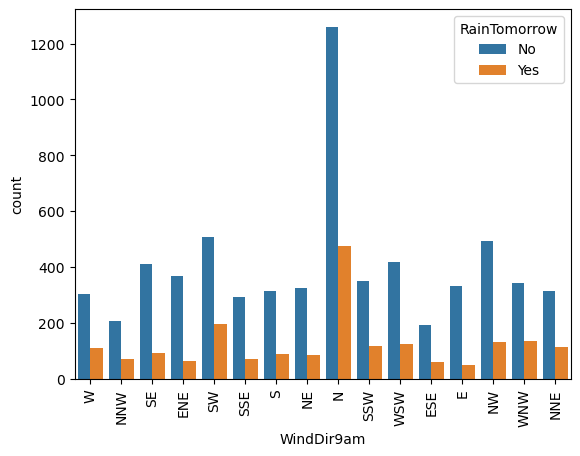

In [20]:
sns.countplot(x='WindDir9am', hue='RainTomorrow', data=df)
plt.xticks(rotation=90)
plt.show()

                Maximum wid direction at 9am will be from North

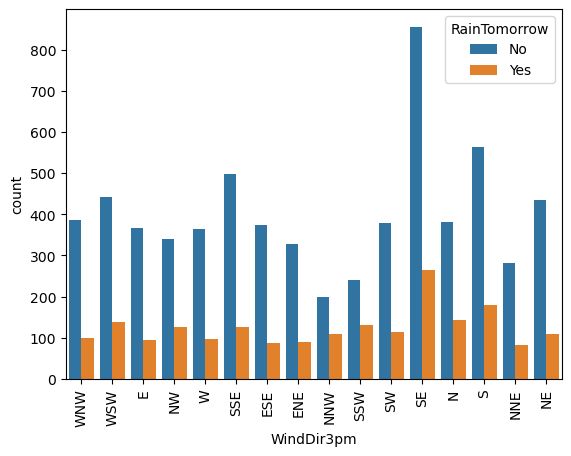

In [21]:
sns.countplot(x='WindDir3pm', hue='RainTomorrow', data=df)
plt.xticks(rotation=90)
plt.show()

                The Max wid direction at 3 pm will be SE

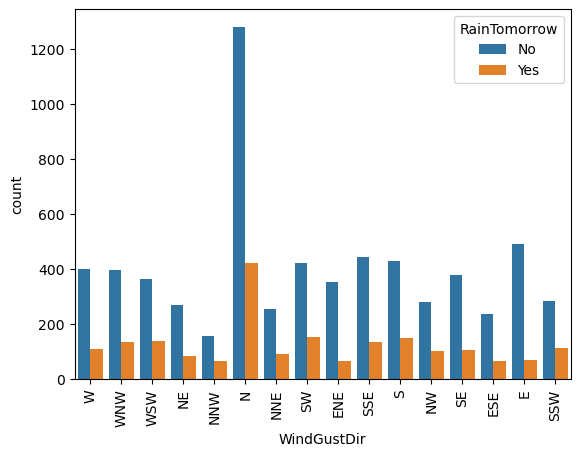

In [22]:
sns.countplot(x='WindGustDir', hue='RainTomorrow', data=df)
plt.xticks(rotation=90)
plt.show()

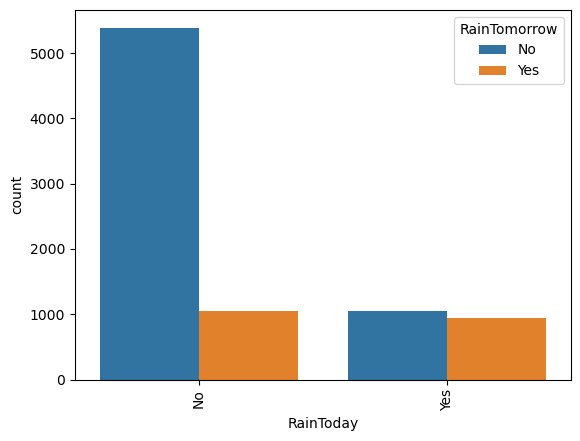

In [23]:
sns.countplot(x='RainToday', hue='RainTomorrow', data=df)
plt.xticks(rotation=90)
plt.show()

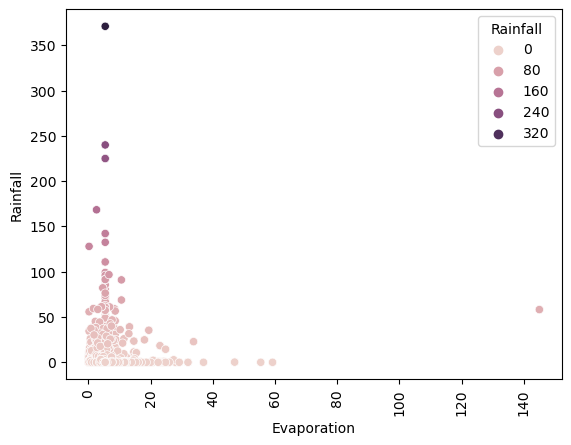

In [24]:
sns.scatterplot(x='Evaporation',y='Rainfall', hue='Rainfall', data=df)
plt.xticks(rotation=90)
plt.show()

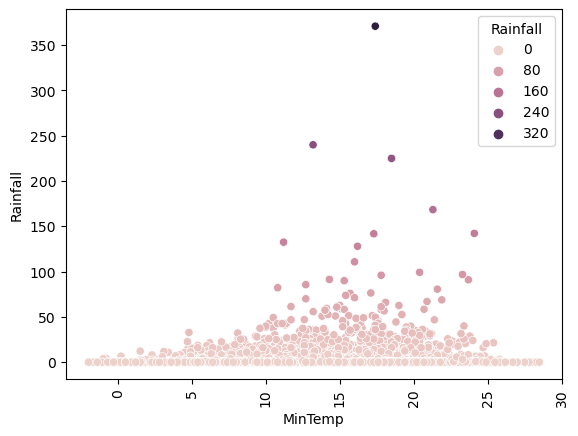

In [25]:
sns.scatterplot(x='MinTemp',y='Rainfall', hue='Rainfall', data=df)
plt.xticks(rotation=90)
plt.show()

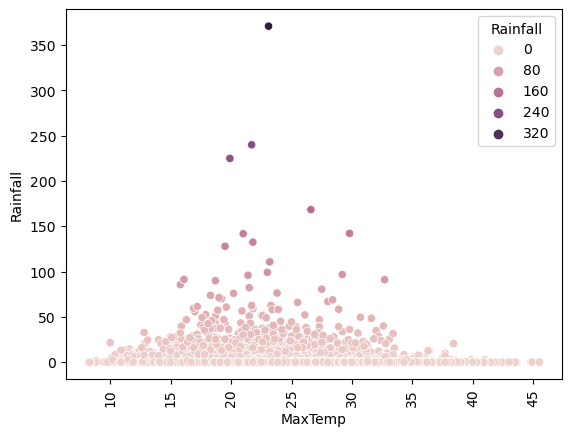

In [26]:
sns.scatterplot(x='MaxTemp',y='Rainfall', hue='Rainfall', data=df)
plt.xticks(rotation=90)
plt.show()

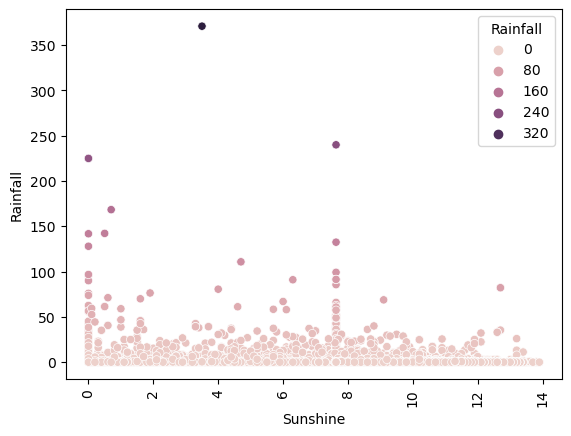

In [27]:
sns.scatterplot(x='Sunshine',y='Rainfall', hue='Rainfall', data=df)
plt.xticks(rotation=90)
plt.show()

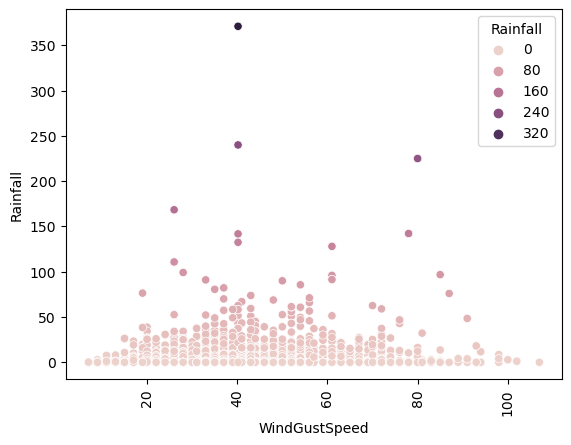

In [28]:
sns.scatterplot(x='WindGustSpeed',y='Rainfall', hue='Rainfall', data=df)
plt.xticks(rotation=90)
plt.show()

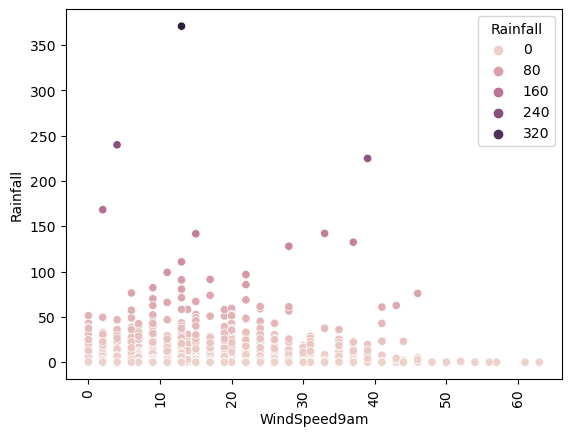

In [29]:
sns.scatterplot(x='WindSpeed9am',y='Rainfall', hue='Rainfall', data=df)
plt.xticks(rotation=90)
plt.show()

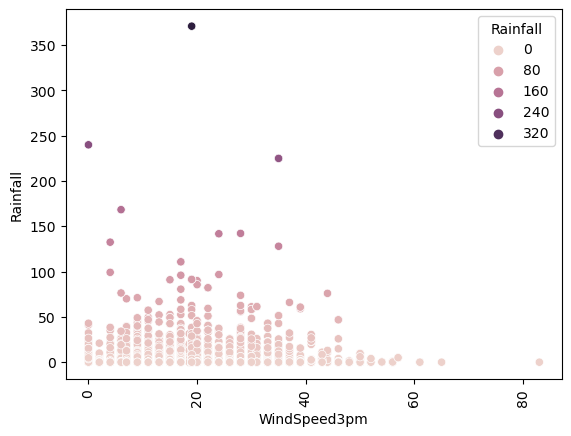

In [30]:
sns.scatterplot(x='WindSpeed3pm',y='Rainfall', hue='Rainfall', data=df)
plt.xticks(rotation=90)
plt.show()

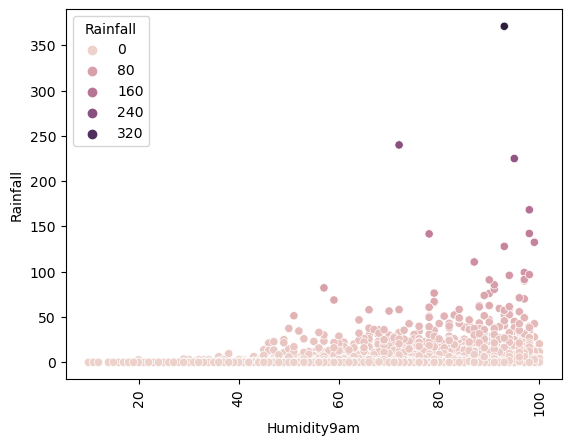

In [31]:
sns.scatterplot(x='Humidity9am',y='Rainfall', hue='Rainfall', data=df)
plt.xticks(rotation=90)
plt.show()

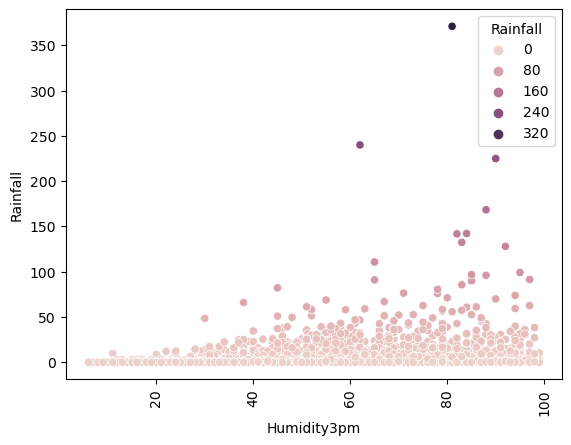

In [32]:
sns.scatterplot(x='Humidity3pm',y='Rainfall', hue='Rainfall', data=df)
plt.xticks(rotation=90)
plt.show()

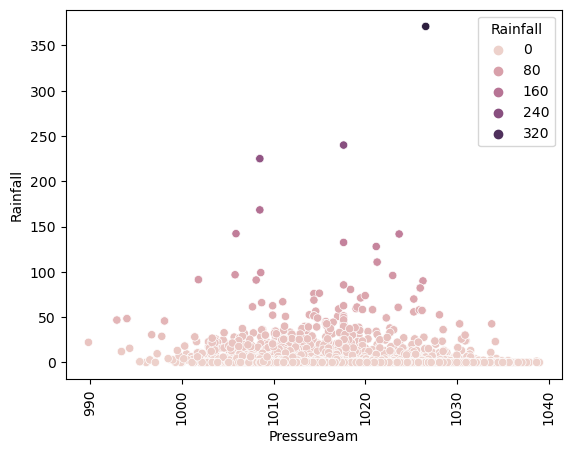

In [33]:
sns.scatterplot(x='Pressure9am',y='Rainfall', hue='Rainfall', data=df)
plt.xticks(rotation=90)
plt.show()

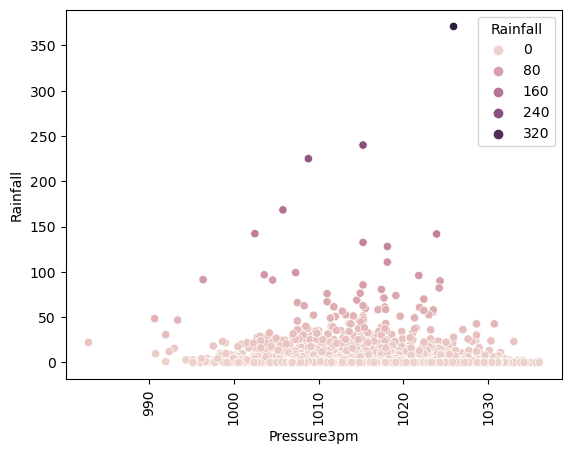

In [34]:
sns.scatterplot(x='Pressure3pm',y='Rainfall', hue='Rainfall', data=df)
plt.xticks(rotation=90)
plt.show()

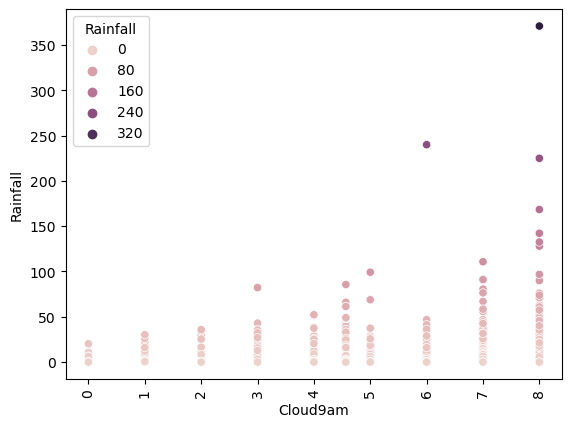

In [35]:
sns.scatterplot(x='Cloud9am',y='Rainfall', hue='Rainfall', data=df)
plt.xticks(rotation=90)
plt.show()

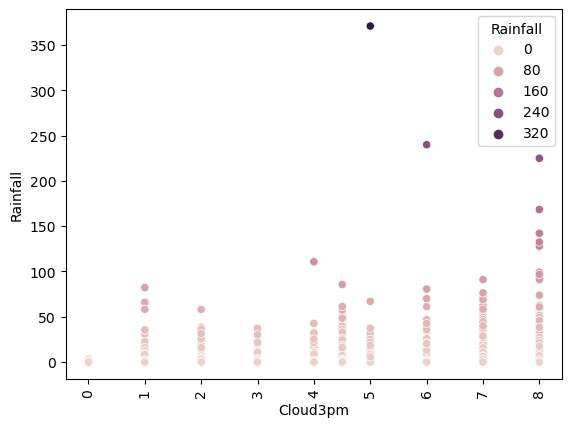

In [36]:
sns.scatterplot(x='Cloud3pm',y='Rainfall', hue='Rainfall', data=df)
plt.xticks(rotation=90)
plt.show()

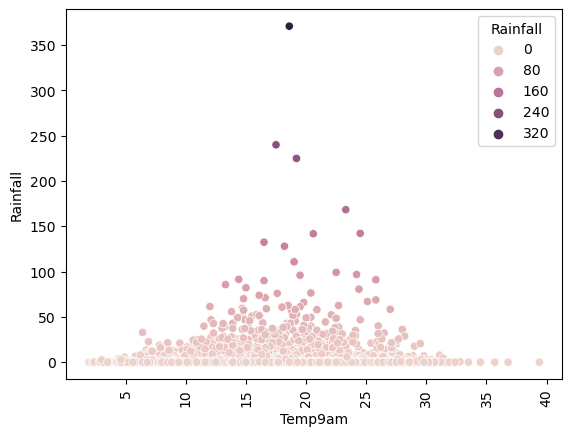

In [37]:
sns.scatterplot(x='Temp9am',y='Rainfall', hue='Rainfall', data=df)
plt.xticks(rotation=90)
plt.show()

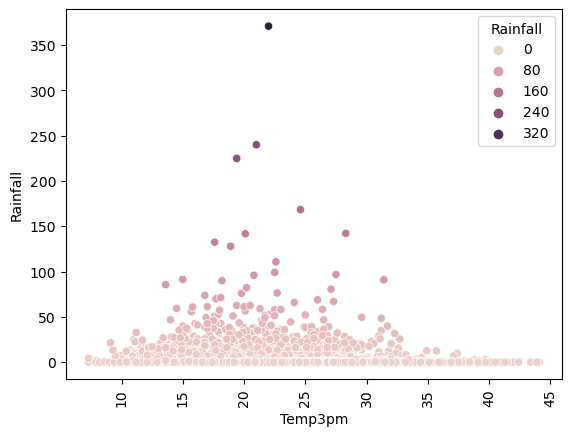

In [38]:
sns.scatterplot(x='Temp3pm',y='Rainfall', hue='Rainfall', data=df)
plt.xticks(rotation=90)
plt.show()

### Label Encoding

In [39]:
l=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [41]:
l2=['Date','Location']

In [42]:
for i in l:
    df[i]=le.fit_transform(df[i])

In [43]:
for i in l2:
    df[i]=le.fit_transform(df[i])

In [44]:
df.dtypes

Date               int32
Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
dtype: object

        ***************Label Encoding has been done Sucessfully*************

### Descriptive Statistics

In [46]:
df.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,1296.570564,5.793591,13.193305,23.859976,2.805913,5.389395,7.632205,7.217804,40.174469,7.267418,...,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,0.236202,0.236320
std,854.249434,3.162654,5.379488,6.114516,10.309308,3.852004,2.825451,4.702616,13.776101,4.588045,...,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,0.424773,0.424846
min,0.000000,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,...,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,589.000000,3.000000,9.300000,19.300000,0.000000,4.000000,7.632205,3.000000,31.000000,3.000000,...,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,0.000000,0.000000
50%,1088.000000,6.000000,13.200000,23.300000,0.000000,5.389395,7.632205,7.000000,40.174469,7.000000,...,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,0.000000,0.000000
75%,2021.000000,8.000000,17.300000,28.000000,1.400000,5.389395,8.900000,12.000000,48.000000,12.000000,...,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,0.000000,0.000000
max,3003.000000,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,...,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000


            Difference in max and 75th values shows presence of few outliers

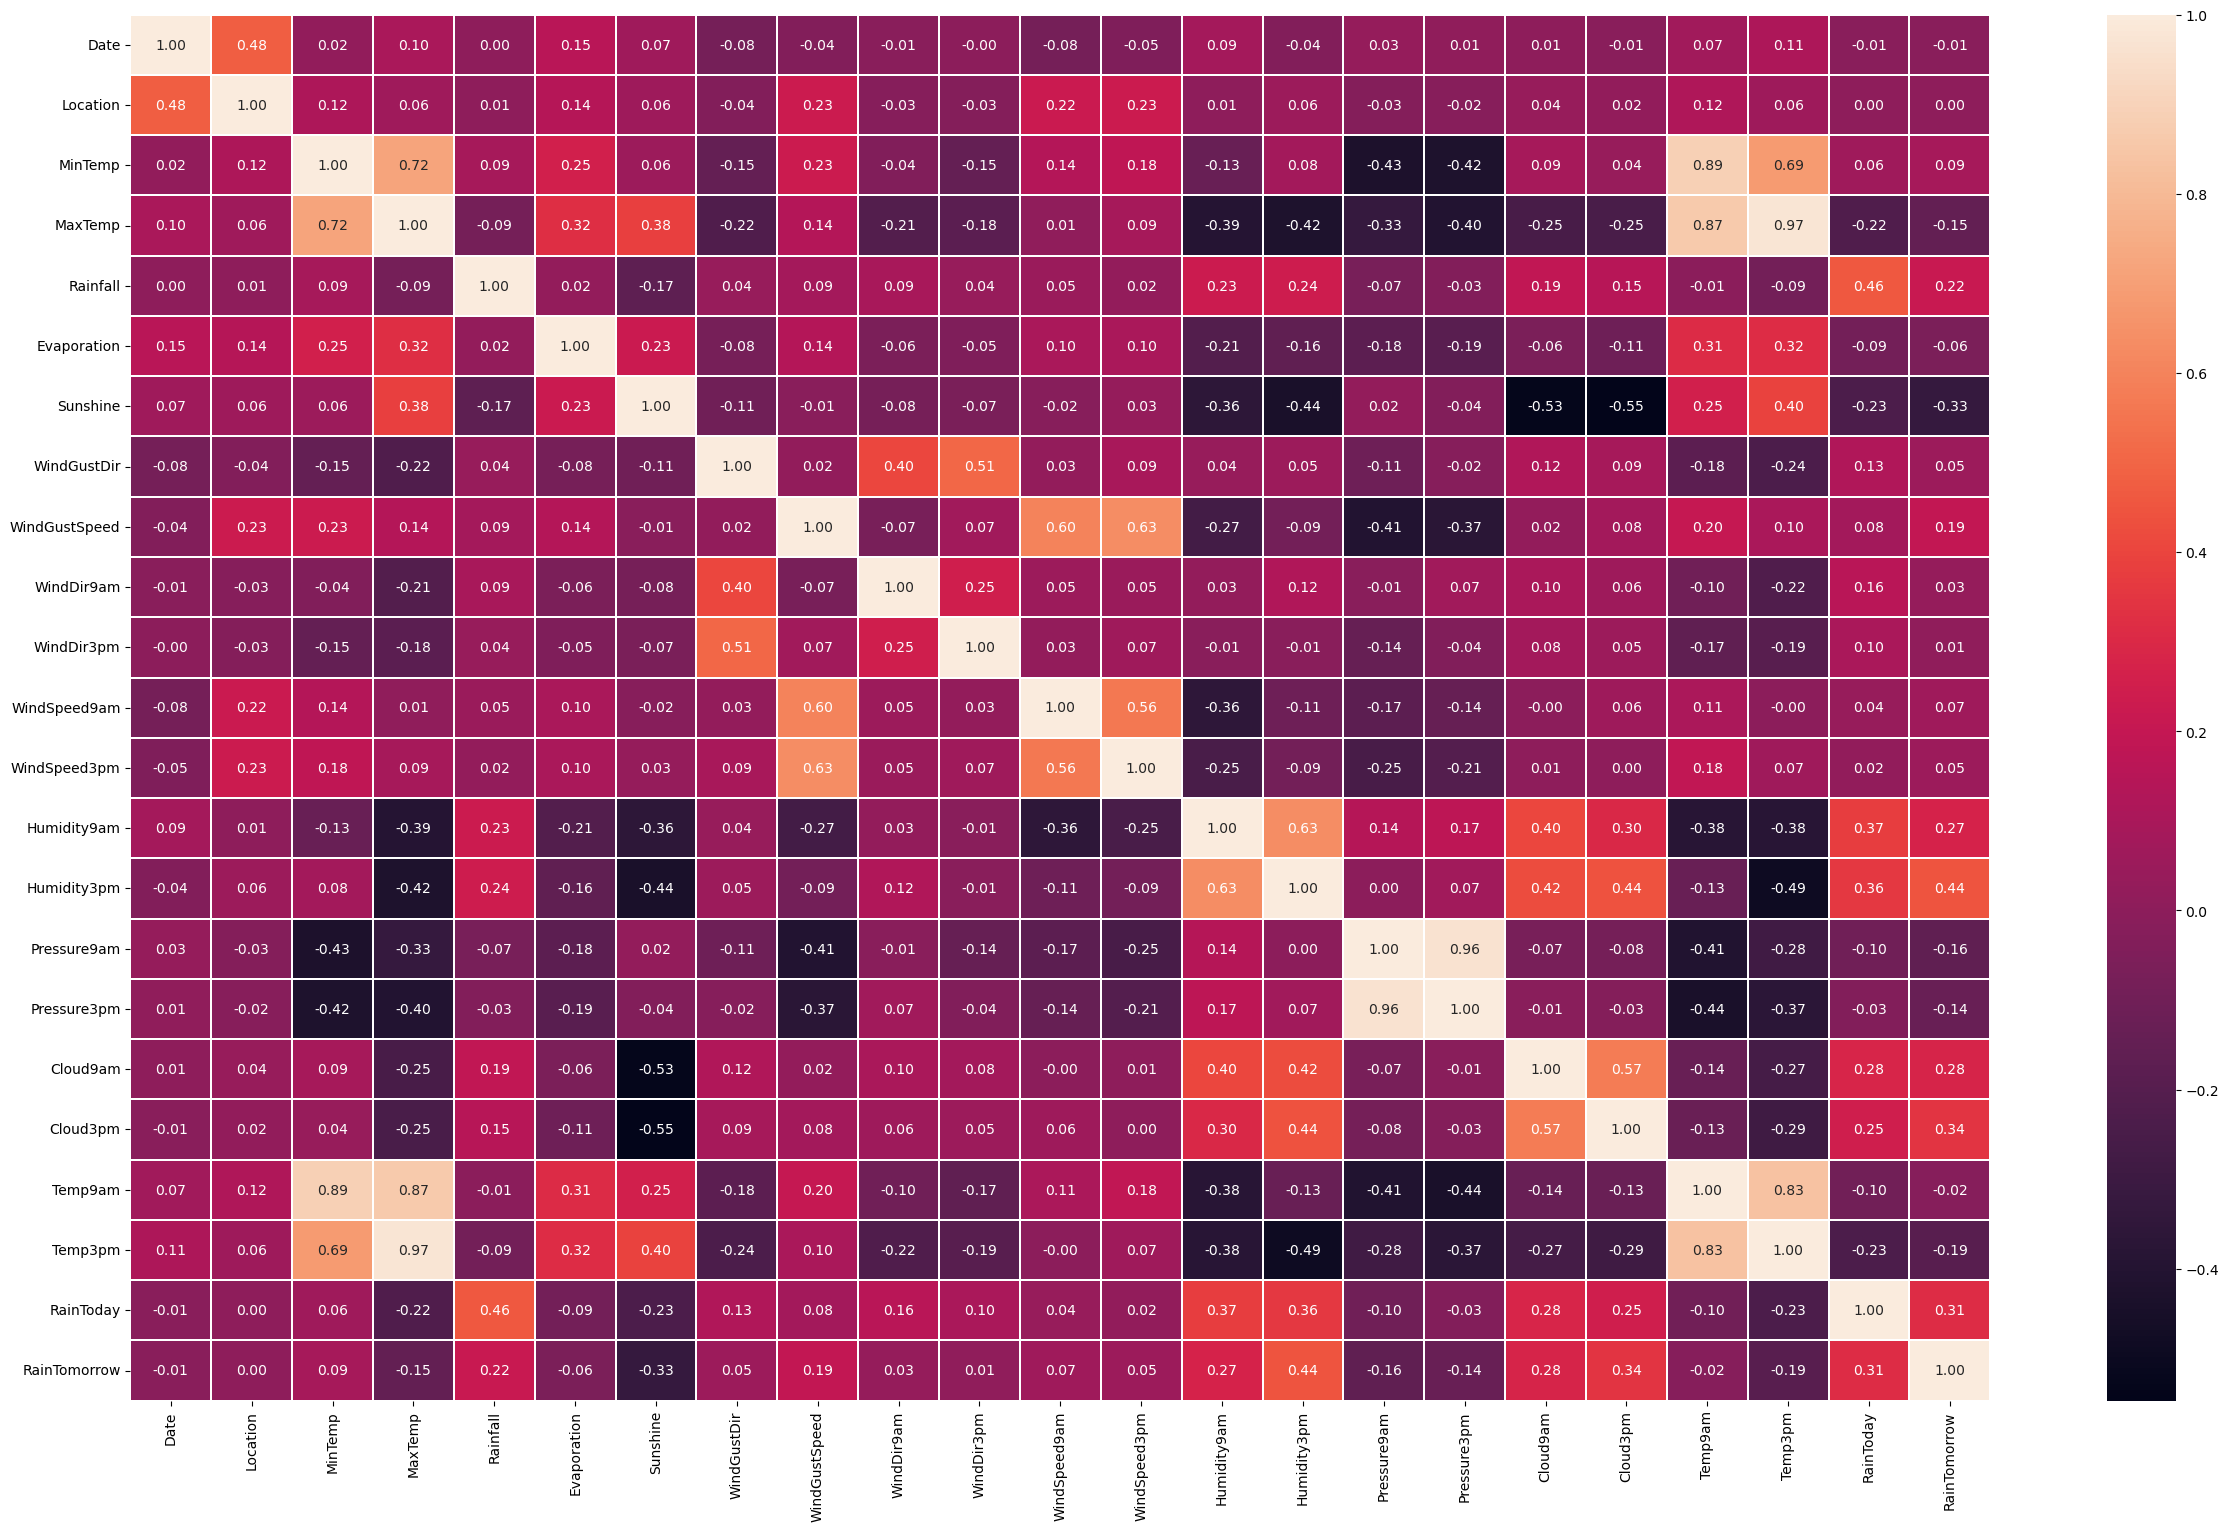

In [48]:
plt.figure(figsize=(30, 18))
sns.heatmap(df.corr(), linewidth=0.2, annot=True, fmt=".2f")
plt.show()

            Multicolinearity is present in some columns

In [49]:
df.corr()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,1.000000,0.475037,0.016931,0.102409,0.004945,0.153853,0.065101,-0.084552,-0.037361,-0.012369,...,0.086328,-0.038345,0.030809,0.013545,0.005237,-0.010572,0.070703,0.113734,-0.011365,-0.011228
Location,0.475037,1.000000,0.116531,0.064268,0.007693,0.143519,0.057817,-0.035408,0.231396,-0.027103,...,0.005662,0.055790,-0.032261,-0.020574,0.038019,0.017561,0.118051,0.060570,0.003071,0.002824
MinTemp,0.016931,0.116531,1.000000,0.717522,0.087684,0.254965,0.056184,-0.145316,0.230058,-0.041650,...,-0.130731,0.079048,-0.429432,-0.422991,0.091604,0.038414,0.887119,0.685520,0.064789,0.092942
MaxTemp,0.102409,0.064268,0.717522,1.000000,-0.087451,0.322405,0.378403,-0.224670,0.139998,-0.214119,...,-0.390976,-0.421879,-0.325721,-0.403258,-0.253968,-0.250132,0.866039,0.974506,-0.224883,-0.152886
Rainfall,0.004945,0.007693,0.087684,-0.087451,1.000000,0.023517,-0.169432,0.038812,0.086000,0.093821,...,0.228800,0.235444,-0.072668,-0.033649,0.185444,0.150760,-0.007083,-0.090687,0.461106,0.220021
Evaporation,0.153853,0.143519,0.254965,0.322405,0.023517,1.000000,0.226001,-0.078765,0.136371,-0.061677,...,-0.213108,-0.161661,-0.177786,-0.189558,-0.062283,-0.108022,0.305264,0.315109,-0.088654,-0.059012
Sunshine,0.065101,0.057817,0.056184,0.378403,-0.169432,0.226001,1.000000,-0.105918,-0.013778,-0.076560,...,-0.360831,-0.440268,0.021887,-0.035863,-0.533391,-0.547304,0.250640,0.395324,-0.234230,-0.327731
WindGustDir,-0.084552,-0.035408,-0.145316,-0.224670,0.038812,-0.078765,-0.105918,1.000000,0.016591,0.403562,...,0.036467,0.053567,-0.109704,-0.024997,0.123883,0.092979,-0.176318,-0.238856,0.125188,0.051832
WindGustSpeed,-0.037361,0.231396,0.230058,0.139998,0.086000,0.136371,-0.013778,0.016591,1.000000,-0.072058,...,-0.269593,-0.091860,-0.407139,-0.372651,0.023313,0.078631,0.202298,0.102199,0.076822,0.190127
WindDir9am,-0.012369,-0.027103,-0.041650,-0.214119,0.093821,-0.061677,-0.076560,0.403562,-0.072058,1.000000,...,0.025604,0.124556,-0.011024,0.073446,0.099582,0.062947,-0.103111,-0.221634,0.157324,0.032860


In [50]:
df.corr()['Rainfall'].sort_values()

Sunshine        -0.169432
Temp3pm         -0.090687
MaxTemp         -0.087451
Pressure9am     -0.072668
Pressure3pm     -0.033649
Temp9am         -0.007083
Date             0.004945
Location         0.007693
Evaporation      0.023517
WindSpeed3pm     0.024791
WindDir3pm       0.038560
WindGustDir      0.038812
WindSpeed9am     0.050631
WindGustSpeed    0.086000
MinTemp          0.087684
WindDir9am       0.093821
Cloud3pm         0.150760
Cloud9am         0.185444
RainTomorrow     0.220021
Humidity9am      0.228800
Humidity3pm      0.235444
RainToday        0.461106
Rainfall         1.000000
Name: Rainfall, dtype: float64

In [51]:
# importing libraries to calculate the variance inflation factor, which may result in low accuracy
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["Variables"]=x1.columns
    vif["VIF factor"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return (vif)

In [53]:
x=df.drop(["RainTomorrow"],axis=1)
y=df["RainTomorrow"]

In [54]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [55]:
calc_vif(x)

,Variables,VIF factor
0,Date,4.893556
1,Location,6.641970
2,MinTemp,58.043435
3,MaxTemp,426.072409
4,Rainfall,1.410755
5,Evaporation,3.557236
6,Sunshine,15.173789
7,WindGustDir,5.304799
8,WindGustSpeed,20.788671
9,WindDir9am,4.726116


In [56]:
df.corr()['RainTomorrow'].sort_values()

Sunshine        -0.327731
Temp3pm         -0.193805
Pressure9am     -0.163985
MaxTemp         -0.152886
Pressure3pm     -0.135242
Evaporation     -0.059012
Temp9am         -0.023211
Date            -0.011228
Location         0.002824
WindDir3pm       0.008918
WindDir9am       0.032860
WindGustDir      0.051832
WindSpeed3pm     0.053568
WindSpeed9am     0.068285
MinTemp          0.092942
WindGustSpeed    0.190127
Rainfall         0.220021
Humidity9am      0.271222
Cloud9am         0.278943
RainToday        0.312929
Cloud3pm         0.344369
Humidity3pm      0.444808
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

                    Due to High VIF we can drop some columns

In [57]:
dfn=df.drop(['MaxTemp','Humidity9am','Pressure9am','Temp3pm'],axis=1)

### Handling Outliers

Date                Axes(0.125,0.712609;0.110714x0.167391)
Location         Axes(0.257857,0.712609;0.110714x0.167391)
MinTemp          Axes(0.390714,0.712609;0.110714x0.167391)
Rainfall         Axes(0.523571,0.712609;0.110714x0.167391)
Evaporation      Axes(0.656429,0.712609;0.110714x0.167391)
Sunshine         Axes(0.789286,0.712609;0.110714x0.167391)
WindGustDir         Axes(0.125,0.511739;0.110714x0.167391)
WindGustSpeed    Axes(0.257857,0.511739;0.110714x0.167391)
WindDir9am       Axes(0.390714,0.511739;0.110714x0.167391)
WindDir3pm       Axes(0.523571,0.511739;0.110714x0.167391)
WindSpeed9am     Axes(0.656429,0.511739;0.110714x0.167391)
WindSpeed3pm     Axes(0.789286,0.511739;0.110714x0.167391)
Humidity3pm          Axes(0.125,0.31087;0.110714x0.167391)
Pressure3pm       Axes(0.257857,0.31087;0.110714x0.167391)
Cloud9am          Axes(0.390714,0.31087;0.110714x0.167391)
Cloud3pm          Axes(0.523571,0.31087;0.110714x0.167391)
Temp9am           Axes(0.656429,0.31087;0.110714x0.16739

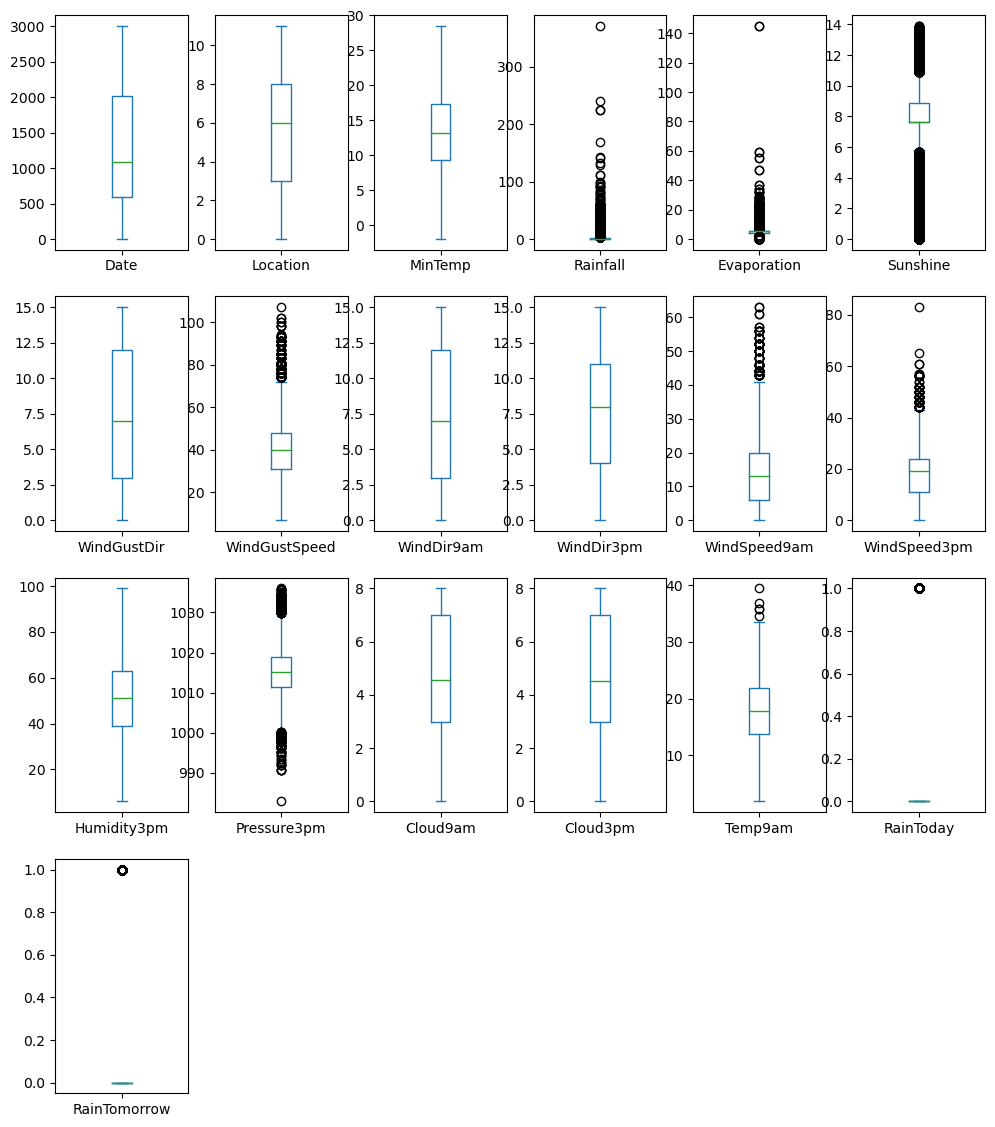

In [58]:
dfn.plot(kind='box',subplots=True,layout=(4,6),figsize=(12,14))

In [59]:
from scipy.stats import zscore
z=np.abs(zscore(dfn))

In [60]:
np.where(z>3)

(array([  12,   52,   52,   62,  123,  267,  381,  381,  431,  462,  563,
         568,  602,  683,  699,  713,  748,  770,  796,  797,  802,  928,
         935,  949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148,
        1149, 1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411,
        1412, 1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665,
        1673, 1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043,
        2063, 2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265,
        2429, 2488, 2500, 2505, 2541, 2593, 2676, 2677, 2735, 2827, 2835,
        2849, 2849, 2855, 2863, 2869, 2877, 2883, 2890, 2891, 2897, 2898,
        2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939, 2947, 2953,
        2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059, 3066, 3067,
        3067, 3067, 3068, 3070, 3082, 3082, 3082, 3089, 3089, 3099, 3099,
        3101, 3141, 3150, 3153, 3157, 3164, 3167, 3172, 3172, 3178, 3185,
        3206, 3212, 3212, 3213, 3221, 

In [61]:
dfnew=dfn[(z<3).all(axis=1)]
dfnew.shape

(8031, 19)

In [62]:
dfn.shape

(8425, 19)

                          Loss of Data = 4.6%

### Handling Skewness

In [63]:
dfnew.skew().sort_values()

Sunshine        -0.723968
Cloud9am        -0.355055
Cloud3pm        -0.265742
WindDir3pm      -0.126790
MinTemp         -0.081214
Location        -0.043171
Temp9am         -0.024282
Pressure3pm      0.058301
Humidity3pm      0.108211
WindGustDir      0.113850
WindDir9am       0.164868
WindSpeed3pm     0.300661
Date             0.397467
WindGustSpeed    0.504164
WindSpeed9am     0.707890
Evaporation      0.857908
RainTomorrow     1.301172
RainToday        1.308804
Rainfall         3.499160
dtype: float64

In [64]:
list=['Rainfall','RainToday']

In [65]:
for i in list:
    if dfnew.skew().loc[i]>0.5:
        dfnew[i]=np.log1p(dfnew[i])

In [66]:
dfnew.skew().sort_values()

Sunshine        -0.723968
Cloud9am        -0.355055
Cloud3pm        -0.265742
WindDir3pm      -0.126790
MinTemp         -0.081214
Location        -0.043171
Temp9am         -0.024282
Pressure3pm      0.058301
Humidity3pm      0.108211
WindGustDir      0.113850
WindDir9am       0.164868
WindSpeed3pm     0.300661
Date             0.397467
WindGustSpeed    0.504164
WindSpeed9am     0.707890
Evaporation      0.857908
RainTomorrow     1.301172
RainToday        1.308804
Rainfall         1.670685
dtype: float64

### Scaling the Data

In [69]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [74]:
x=dfnew.drop(["RainTomorrow"],axis=1)
y=dfnew["RainTomorrow"]

In [76]:
dfx=ss.fit_transform(x)

In [77]:
dfx.mean()

5.744976753665692e-16

### Building Machine Learning Models

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [79]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((accuracy_score(y_test,pred_test))>maxacc):
            maxacc=accuracy_score(y_test,pred_test)
            rs=i
        print(f"at random state {i},  accuracy score is {accuracy_score(y_test,pred_test)}")
        print(f"at random state {i}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
        print(f"at random state {i}, classification report is {classification_report(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)

### K Neighbors Classifier

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
model_selection(knn)

at random state 0,  accuracy score is 0.8311203319502075
at random state 0, confusion matrix is [[1764  117]
 [ 290  239]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1881
           1       0.67      0.45      0.54       529

    accuracy                           0.83      2410
   macro avg       0.77      0.69      0.72      2410
weighted avg       0.82      0.83      0.82      2410



at random state 1,  accuracy score is 0.8128630705394191
at random state 1, confusion matrix is [[1718  119]
 [ 332  241]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.84      0.94      0.88      1837
           1       0.67      0.42      0.52       573

    accuracy                           0.81      2410
   macro avg       0.75      0.68      0.70      2410
weighted avg       0.80      0.81      0.80      2410



at rando

at random state 17,  accuracy score is 0.8307053941908714
at random state 17, confusion matrix is [[1752  110]
 [ 298  250]]
at random state 17, classification report is               precision    recall  f1-score   support

           0       0.85      0.94      0.90      1862
           1       0.69      0.46      0.55       548

    accuracy                           0.83      2410
   macro avg       0.77      0.70      0.72      2410
weighted avg       0.82      0.83      0.82      2410



at random state 18,  accuracy score is 0.829045643153527
at random state 18, confusion matrix is [[1747  103]
 [ 309  251]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1850
           1       0.71      0.45      0.55       560

    accuracy                           0.83      2410
   macro avg       0.78      0.70      0.72      2410
weighted avg       0.82      0.83      0.81      2410



at 

at random state 34,  accuracy score is 0.8265560165975103
at random state 34, confusion matrix is [[1749   95]
 [ 323  243]]
at random state 34, classification report is               precision    recall  f1-score   support

           0       0.84      0.95      0.89      1844
           1       0.72      0.43      0.54       566

    accuracy                           0.83      2410
   macro avg       0.78      0.69      0.72      2410
weighted avg       0.81      0.83      0.81      2410



at random state 35,  accuracy score is 0.820746887966805
at random state 35, confusion matrix is [[1729  115]
 [ 317  249]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1844
           1       0.68      0.44      0.54       566

    accuracy                           0.82      2410
   macro avg       0.76      0.69      0.71      2410
weighted avg       0.81      0.82      0.81      2410



at 

at random state 51,  accuracy score is 0.8394190871369295
at random state 51, confusion matrix is [[1796   92]
 [ 295  227]]
at random state 51, classification report is               precision    recall  f1-score   support

           0       0.86      0.95      0.90      1888
           1       0.71      0.43      0.54       522

    accuracy                           0.84      2410
   macro avg       0.79      0.69      0.72      2410
weighted avg       0.83      0.84      0.82      2410



at random state 52,  accuracy score is 0.8265560165975103
at random state 52, confusion matrix is [[1734  107]
 [ 311  258]]
at random state 52, classification report is               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1841
           1       0.71      0.45      0.55       569

    accuracy                           0.83      2410
   macro avg       0.78      0.70      0.72      2410
weighted avg       0.81      0.83      0.81      2410



at

at random state 68,  accuracy score is 0.8257261410788381
at random state 68, confusion matrix is [[1760  110]
 [ 310  230]]
at random state 68, classification report is               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1870
           1       0.68      0.43      0.52       540

    accuracy                           0.83      2410
   macro avg       0.76      0.68      0.71      2410
weighted avg       0.81      0.83      0.81      2410



at random state 69,  accuracy score is 0.8215767634854771
at random state 69, confusion matrix is [[1736  113]
 [ 317  244]]
at random state 69, classification report is               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1849
           1       0.68      0.43      0.53       561

    accuracy                           0.82      2410
   macro avg       0.76      0.69      0.71      2410
weighted avg       0.81      0.82      0.81      2410



at

at random state 85,  accuracy score is 0.8265560165975103
at random state 85, confusion matrix is [[1761  110]
 [ 308  231]]
at random state 85, classification report is               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1871
           1       0.68      0.43      0.53       539

    accuracy                           0.83      2410
   macro avg       0.76      0.68      0.71      2410
weighted avg       0.81      0.83      0.81      2410



at random state 86,  accuracy score is 0.8199170124481328
at random state 86, confusion matrix is [[1734  110]
 [ 324  242]]
at random state 86, classification report is               precision    recall  f1-score   support

           0       0.84      0.94      0.89      1844
           1       0.69      0.43      0.53       566

    accuracy                           0.82      2410
   macro avg       0.77      0.68      0.71      2410
weighted avg       0.81      0.82      0.80      2410



at

                                        CV Score

In [81]:
score=cross_val_score(knn,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.81642813 0.79701121 0.81506849 0.79763387 0.82129514]
0.809487368850941
0.010147970846645314


### Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model_selection(lr)

at random state 0,  accuracy score is 0.8340248962655602
at random state 0, confusion matrix is [[1762  119]
 [ 281  248]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1881
           1       0.68      0.47      0.55       529

    accuracy                           0.83      2410
   macro avg       0.77      0.70      0.73      2410
weighted avg       0.82      0.83      0.82      2410



at random state 1,  accuracy score is 0.8136929460580913
at random state 1, confusion matrix is [[1716  121]
 [ 328  245]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.84      0.93      0.88      1837
           1       0.67      0.43      0.52       573

    accuracy                           0.81      2410
   macro avg       0.75      0.68      0.70      2410
weighted avg       0.80      0.81      0.80      2410



at rando

at random state 20, classification report is               precision    recall  f1-score   support

           0       0.87      0.93      0.90      1889
           1       0.67      0.48      0.56       521

    accuracy                           0.84      2410
   macro avg       0.77      0.71      0.73      2410
weighted avg       0.82      0.84      0.83      2410



at random state 21,  accuracy score is 0.8327800829875519
at random state 21, confusion matrix is [[1759  113]
 [ 290  248]]
at random state 21, classification report is               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1872
           1       0.69      0.46      0.55       538

    accuracy                           0.83      2410
   macro avg       0.77      0.70      0.72      2410
weighted avg       0.82      0.83      0.82      2410



at random state 22,  accuracy score is 0.8278008298755186
at random state 22, confusion matrix is [[1733  112]
 [ 303  262]]
at

at random state 37,  accuracy score is 0.8302904564315353
at random state 37, confusion matrix is [[1758  110]
 [ 299  243]]
at random state 37, classification report is               precision    recall  f1-score   support

           0       0.85      0.94      0.90      1868
           1       0.69      0.45      0.54       542

    accuracy                           0.83      2410
   macro avg       0.77      0.69      0.72      2410
weighted avg       0.82      0.83      0.82      2410



at random state 38,  accuracy score is 0.8485477178423236
at random state 38, confusion matrix is [[1785  118]
 [ 247  260]]
at random state 38, classification report is               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1903
           1       0.69      0.51      0.59       507

    accuracy                           0.85      2410
   macro avg       0.78      0.73      0.75      2410
weighted avg       0.84      0.85      0.84      2410



at

at random state 54, classification report is               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1884
           1       0.69      0.44      0.54       526

    accuracy                           0.83      2410
   macro avg       0.77      0.69      0.72      2410
weighted avg       0.82      0.83      0.82      2410



at random state 55,  accuracy score is 0.8336099585062241
at random state 55, confusion matrix is [[1730  116]
 [ 285  279]]
at random state 55, classification report is               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1846
           1       0.71      0.49      0.58       564

    accuracy                           0.83      2410
   macro avg       0.78      0.72      0.74      2410
weighted avg       0.82      0.83      0.82      2410



at random state 56,  accuracy score is 0.8236514522821576
at random state 56, confusion matrix is [[1732   98]
 [ 327  253]]
at

at random state 73, classification report is               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1843
           1       0.71      0.49      0.58       567

    accuracy                           0.83      2410
   macro avg       0.78      0.71      0.74      2410
weighted avg       0.82      0.83      0.82      2410



at random state 74,  accuracy score is 0.8356846473029046
at random state 74, confusion matrix is [[1749  108]
 [ 288  265]]
at random state 74, classification report is               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1857
           1       0.71      0.48      0.57       553

    accuracy                           0.84      2410
   macro avg       0.78      0.71      0.74      2410
weighted avg       0.82      0.84      0.82      2410



at random state 75,  accuracy score is 0.8228215767634854
at random state 75, confusion matrix is [[1724  106]
 [ 321  259]]
at

at random state 92,  accuracy score is 0.8232365145228215
at random state 92, confusion matrix is [[1732  125]
 [ 301  252]]
at random state 92, classification report is               precision    recall  f1-score   support

           0       0.85      0.93      0.89      1857
           1       0.67      0.46      0.54       553

    accuracy                           0.82      2410
   macro avg       0.76      0.69      0.72      2410
weighted avg       0.81      0.82      0.81      2410



at random state 93,  accuracy score is 0.8398340248962656
at random state 93, confusion matrix is [[1779  117]
 [ 269  245]]
at random state 93, classification report is               precision    recall  f1-score   support

           0       0.87      0.94      0.90      1896
           1       0.68      0.48      0.56       514

    accuracy                           0.84      2410
   macro avg       0.77      0.71      0.73      2410
weighted avg       0.83      0.84      0.83      2410



at

                CV Score for Logistic Regression

In [83]:
score=cross_val_score(lr,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.85749844 0.79452055 0.79701121 0.82129514 0.85927771]
0.8259206104054414
0.028117496374194865


### Decision Tree Classifier

In [84]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model_selection(dtc)

at random state 0,  accuracy score is 0.84149377593361
at random state 0, confusion matrix is [[1682  199]
 [ 183  346]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.90      0.89      0.90      1881
           1       0.63      0.65      0.64       529

    accuracy                           0.84      2410
   macro avg       0.77      0.77      0.77      2410
weighted avg       0.84      0.84      0.84      2410



at random state 1,  accuracy score is 0.8481327800829875
at random state 1, confusion matrix is [[1656  181]
 [ 185  388]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1837
           1       0.68      0.68      0.68       573

    accuracy                           0.85      2410
   macro avg       0.79      0.79      0.79      2410
weighted avg       0.85      0.85      0.85      2410



at random 

at random state 18,  accuracy score is 0.8394190871369295
at random state 18, confusion matrix is [[1649  201]
 [ 186  374]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.90      0.89      0.89      1850
           1       0.65      0.67      0.66       560

    accuracy                           0.84      2410
   macro avg       0.77      0.78      0.78      2410
weighted avg       0.84      0.84      0.84      2410



at random state 19,  accuracy score is 0.84149377593361
at random state 19, confusion matrix is [[1656  179]
 [ 203  372]]
at random state 19, classification report is               precision    recall  f1-score   support

           0       0.89      0.90      0.90      1835
           1       0.68      0.65      0.66       575

    accuracy                           0.84      2410
   macro avg       0.78      0.77      0.78      2410
weighted avg       0.84      0.84      0.84      2410



at r

at random state 36,  accuracy score is 0.8261410788381742
at random state 36, confusion matrix is [[1641  209]
 [ 210  350]]
at random state 36, classification report is               precision    recall  f1-score   support

           0       0.89      0.89      0.89      1850
           1       0.63      0.62      0.63       560

    accuracy                           0.83      2410
   macro avg       0.76      0.76      0.76      2410
weighted avg       0.83      0.83      0.83      2410



at random state 37,  accuracy score is 0.8410788381742739
at random state 37, confusion matrix is [[1667  201]
 [ 182  360]]
at random state 37, classification report is               precision    recall  f1-score   support

           0       0.90      0.89      0.90      1868
           1       0.64      0.66      0.65       542

    accuracy                           0.84      2410
   macro avg       0.77      0.78      0.77      2410
weighted avg       0.84      0.84      0.84      2410



at

at random state 54,  accuracy score is 0.8419087136929461
at random state 54, confusion matrix is [[1690  194]
 [ 187  339]]
at random state 54, classification report is               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1884
           1       0.64      0.64      0.64       526

    accuracy                           0.84      2410
   macro avg       0.77      0.77      0.77      2410
weighted avg       0.84      0.84      0.84      2410



at random state 55,  accuracy score is 0.8315352697095436
at random state 55, confusion matrix is [[1660  186]
 [ 220  344]]
at random state 55, classification report is               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1846
           1       0.65      0.61      0.63       564

    accuracy                           0.83      2410
   macro avg       0.77      0.75      0.76      2410
weighted avg       0.83      0.83      0.83      2410



at

at random state 72,  accuracy score is 0.8481327800829875
at random state 72, confusion matrix is [[1686  185]
 [ 181  358]]
at random state 72, classification report is               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1871
           1       0.66      0.66      0.66       539

    accuracy                           0.85      2410
   macro avg       0.78      0.78      0.78      2410
weighted avg       0.85      0.85      0.85      2410



at random state 73,  accuracy score is 0.8419087136929461
at random state 73, confusion matrix is [[1644  199]
 [ 182  385]]
at random state 73, classification report is               precision    recall  f1-score   support

           0       0.90      0.89      0.90      1843
           1       0.66      0.68      0.67       567

    accuracy                           0.84      2410
   macro avg       0.78      0.79      0.78      2410
weighted avg       0.84      0.84      0.84      2410



at

at random state 90,  accuracy score is 0.8377593360995851
at random state 90, confusion matrix is [[1672  189]
 [ 202  347]]
at random state 90, classification report is               precision    recall  f1-score   support

           0       0.89      0.90      0.90      1861
           1       0.65      0.63      0.64       549

    accuracy                           0.84      2410
   macro avg       0.77      0.77      0.77      2410
weighted avg       0.84      0.84      0.84      2410



at random state 91,  accuracy score is 0.8468879668049792
at random state 91, confusion matrix is [[1672  176]
 [ 193  369]]
at random state 91, classification report is               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1848
           1       0.68      0.66      0.67       562

    accuracy                           0.85      2410
   macro avg       0.79      0.78      0.78      2410
weighted avg       0.85      0.85      0.85      2410



at

                    CV Score for Decision Tree Classifier

In [85]:
score=cross_val_score(dtc,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.75108899 0.82129514 0.84557908 0.7384807  0.74533001]
0.7803547834388932
0.04419724494209453


### Random Forrest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_selection(rf)

at random state 0,  accuracy score is 0.8946058091286307
at random state 0, confusion matrix is [[1808   73]
 [ 181  348]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.91      0.96      0.93      1881
           1       0.83      0.66      0.73       529

    accuracy                           0.89      2410
   macro avg       0.87      0.81      0.83      2410
weighted avg       0.89      0.89      0.89      2410



at random state 1,  accuracy score is 0.8717842323651452
at random state 1, confusion matrix is [[1767   70]
 [ 239  334]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1837
           1       0.83      0.58      0.68       573

    accuracy                           0.87      2410
   macro avg       0.85      0.77      0.80      2410
weighted avg       0.87      0.87      0.86      2410



at rando

at random state 17,  accuracy score is 0.8925311203319503
at random state 17, confusion matrix is [[1797   65]
 [ 194  354]]
at random state 17, classification report is               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1862
           1       0.84      0.65      0.73       548

    accuracy                           0.89      2410
   macro avg       0.87      0.81      0.83      2410
weighted avg       0.89      0.89      0.89      2410



at random state 18,  accuracy score is 0.8825726141078838
at random state 18, confusion matrix is [[1781   69]
 [ 214  346]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.89      0.96      0.93      1850
           1       0.83      0.62      0.71       560

    accuracy                           0.88      2410
   macro avg       0.86      0.79      0.82      2410
weighted avg       0.88      0.88      0.88      2410



at

at random state 34,  accuracy score is 0.8742738589211618
at random state 34, confusion matrix is [[1775   69]
 [ 234  332]]
at random state 34, classification report is               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1844
           1       0.83      0.59      0.69       566

    accuracy                           0.87      2410
   macro avg       0.86      0.77      0.80      2410
weighted avg       0.87      0.87      0.87      2410



at random state 35,  accuracy score is 0.8829875518672199
at random state 35, confusion matrix is [[1774   70]
 [ 212  354]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.89      0.96      0.93      1844
           1       0.83      0.63      0.72       566

    accuracy                           0.88      2410
   macro avg       0.86      0.79      0.82      2410
weighted avg       0.88      0.88      0.88      2410



at

at random state 51,  accuracy score is 0.8962655601659751
at random state 51, confusion matrix is [[1833   55]
 [ 195  327]]
at random state 51, classification report is               precision    recall  f1-score   support

           0       0.90      0.97      0.94      1888
           1       0.86      0.63      0.72       522

    accuracy                           0.90      2410
   macro avg       0.88      0.80      0.83      2410
weighted avg       0.89      0.90      0.89      2410



at random state 52,  accuracy score is 0.883402489626556
at random state 52, confusion matrix is [[1778   63]
 [ 218  351]]
at random state 52, classification report is               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1841
           1       0.85      0.62      0.71       569

    accuracy                           0.88      2410
   macro avg       0.87      0.79      0.82      2410
weighted avg       0.88      0.88      0.88      2410



at 

at random state 68,  accuracy score is 0.8817427385892116
at random state 68, confusion matrix is [[1796   74]
 [ 211  329]]
at random state 68, classification report is               precision    recall  f1-score   support

           0       0.89      0.96      0.93      1870
           1       0.82      0.61      0.70       540

    accuracy                           0.88      2410
   macro avg       0.86      0.78      0.81      2410
weighted avg       0.88      0.88      0.88      2410



at random state 69,  accuracy score is 0.891286307053942
at random state 69, confusion matrix is [[1788   61]
 [ 201  360]]
at random state 69, classification report is               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1849
           1       0.86      0.64      0.73       561

    accuracy                           0.89      2410
   macro avg       0.88      0.80      0.83      2410
weighted avg       0.89      0.89      0.89      2410



at 

at random state 85,  accuracy score is 0.8946058091286307
at random state 85, confusion matrix is [[1817   54]
 [ 200  339]]
at random state 85, classification report is               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1871
           1       0.86      0.63      0.73       539

    accuracy                           0.89      2410
   macro avg       0.88      0.80      0.83      2410
weighted avg       0.89      0.89      0.89      2410



at random state 86,  accuracy score is 0.8863070539419087
at random state 86, confusion matrix is [[1784   60]
 [ 214  352]]
at random state 86, classification report is               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1844
           1       0.85      0.62      0.72       566

    accuracy                           0.89      2410
   macro avg       0.87      0.79      0.82      2410
weighted avg       0.88      0.89      0.88      2410



at

                    CV Score for Random Forest Classifier

In [87]:
score=cross_val_score(rf,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.84629745 0.84806974 0.86176837 0.78455791 0.84495641]
0.8371299754111255
0.026966078031900112


          ****** We will Choose Random Forest Classifier as it gives max accuracy**********

### Hyper Parameter Tuning

In [88]:
from sklearn.model_selection import GridSearchCV
dict={"max_features":['auto','sqrt','log2'],
      "max_depth":[17,19,20],
      "criterion":["gini","entropy"],
     "n_estimators":[100,200]}
gd=GridSearchCV(estimator=rf,param_grid=dict,cv=3)

In [89]:
gd.fit(dfx,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [17, 19, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [90]:
gd.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 200}

In [91]:
gd.best_score_

0.8358859419748473

### Final Model

In [92]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=47,test_size=0.30)
rf=RandomForestClassifier(max_features='auto',max_depth=17,criterion="entropy",n_estimators=100)

rf.fit(x_train,y_train)

rf.score(x_train,y_train)
pred_train=rf.predict(x_train)
pred=rf.predict(x_test)
        
print("Accuracy score:--",accuracy_score(y_test,pred))
print("Confusion matrix:--", confusion_matrix(y_test,pred))
print("classification report:--", classification_report(y_test,pred))
print("\n")

InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

In [93]:
x_train, x_test, y_train, y_test = train_test_split(dfx, y, random_state=47, test_size=0.30)

rf = RandomForestClassifier(max_features='sqrt', max_depth=17, criterion="entropy", n_estimators=100)

rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_train = rf.predict(x_train)
pred = rf.predict(x_test)

print("Accuracy score:--", accuracy_score(y_test, pred))
print("Confusion matrix:--", confusion_matrix(y_test, pred))
print("Classification report:--", classification_report(y_test, pred))
print("\n")

Accuracy score:-- 0.8854771784232365
Confusion matrix:-- [[1788   63]
 [ 213  346]]
Classification report:--               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1851
           1       0.85      0.62      0.71       559

    accuracy                           0.89      2410
   macro avg       0.87      0.79      0.82      2410
weighted avg       0.88      0.89      0.88      2410





### AUC ROC Curve

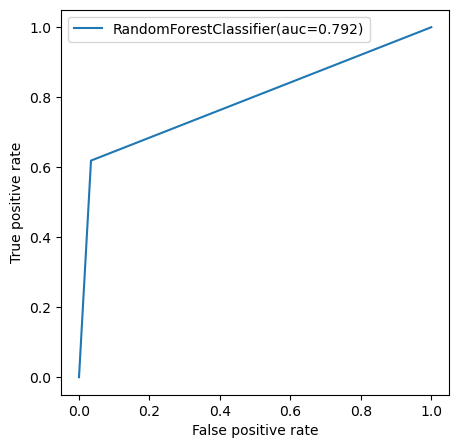

In [94]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,threshold=roc_curve(y_test,pred)
auc=auc(fpr,tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label='RandomForestClassifier(auc=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

                    AUC Score is 79%

### Prediction

In [95]:
dfpred=pd.DataFrame({'Expected':y_test,'Predicted':pred})

In [96]:
dfpred.sample(25)

,Expected,Predicted
2921,1,1
1539,1,1
5441,0,0
4594,0,0
6938,0,0
4816,1,0
4063,0,0
1756,0,0
1647,0,0
7278,0,0


        ******Building of Model to whether it will rain tomorrow or not complete*******

#### Model Saving

In [97]:
import pickle
filename="rain_tomorrow.pkl"
pickle.dump(rf,open(filename,'wb'))

# Prediction for Amount of Rainfall

Date                Axes(0.125,0.712609;0.110714x0.167391)
Location         Axes(0.257857,0.712609;0.110714x0.167391)
MinTemp          Axes(0.390714,0.712609;0.110714x0.167391)
Rainfall         Axes(0.523571,0.712609;0.110714x0.167391)
Evaporation      Axes(0.656429,0.712609;0.110714x0.167391)
Sunshine         Axes(0.789286,0.712609;0.110714x0.167391)
WindGustDir         Axes(0.125,0.511739;0.110714x0.167391)
WindGustSpeed    Axes(0.257857,0.511739;0.110714x0.167391)
WindDir9am       Axes(0.390714,0.511739;0.110714x0.167391)
WindDir3pm       Axes(0.523571,0.511739;0.110714x0.167391)
WindSpeed9am     Axes(0.656429,0.511739;0.110714x0.167391)
WindSpeed3pm     Axes(0.789286,0.511739;0.110714x0.167391)
Humidity3pm          Axes(0.125,0.31087;0.110714x0.167391)
Pressure3pm       Axes(0.257857,0.31087;0.110714x0.167391)
Cloud9am          Axes(0.390714,0.31087;0.110714x0.167391)
Cloud3pm          Axes(0.523571,0.31087;0.110714x0.167391)
Temp9am           Axes(0.656429,0.31087;0.110714x0.16739

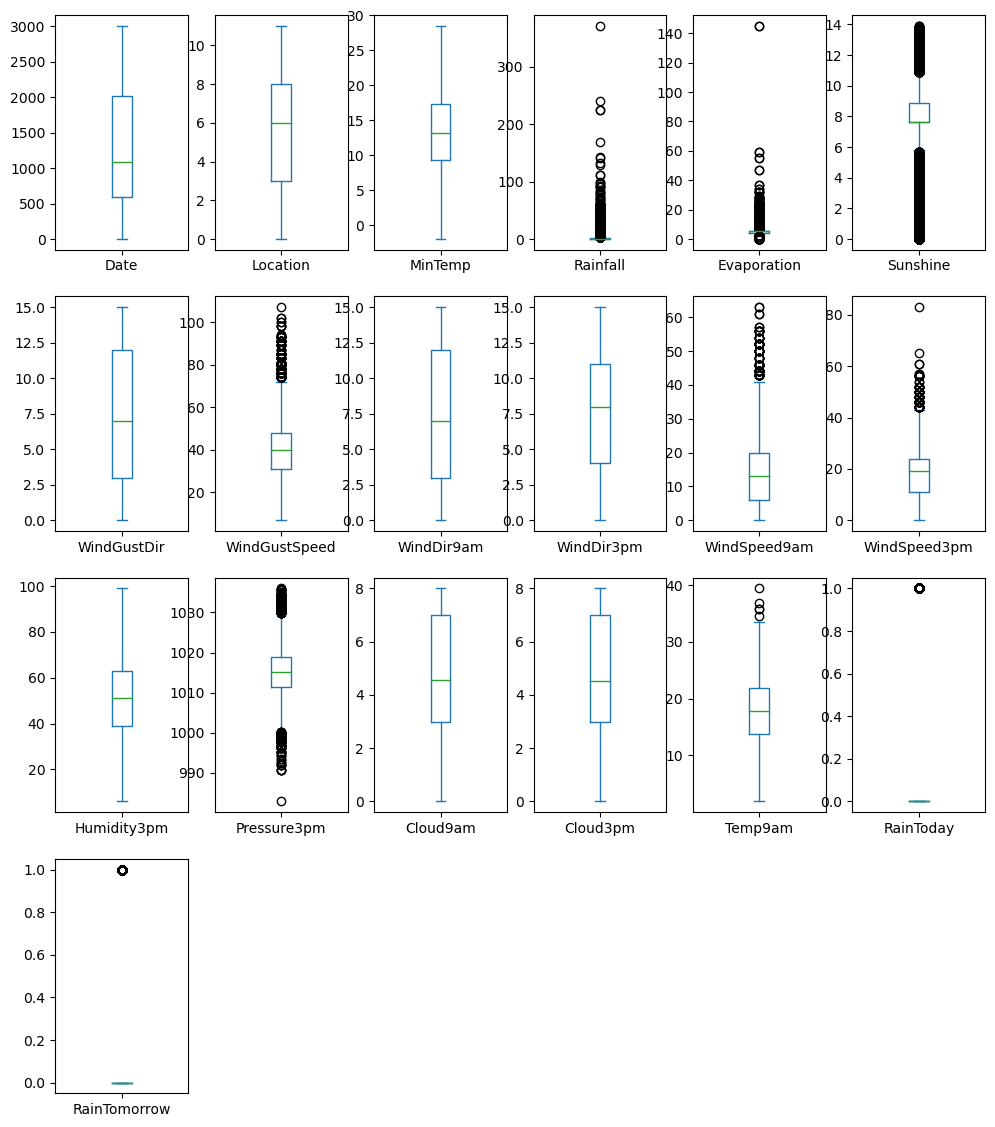

In [98]:
dfn.plot(kind='box',subplots=True,layout=(4,6),figsize=(12,14))

In [99]:
from scipy.stats import zscore
z=np.abs(zscore(dfn))

In [100]:
np.where(z>3)

(array([  12,   52,   52,   62,  123,  267,  381,  381,  431,  462,  563,
         568,  602,  683,  699,  713,  748,  770,  796,  797,  802,  928,
         935,  949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148,
        1149, 1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411,
        1412, 1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665,
        1673, 1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043,
        2063, 2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265,
        2429, 2488, 2500, 2505, 2541, 2593, 2676, 2677, 2735, 2827, 2835,
        2849, 2849, 2855, 2863, 2869, 2877, 2883, 2890, 2891, 2897, 2898,
        2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939, 2947, 2953,
        2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059, 3066, 3067,
        3067, 3067, 3068, 3070, 3082, 3082, 3082, 3089, 3089, 3099, 3099,
        3101, 3141, 3150, 3153, 3157, 3164, 3167, 3172, 3172, 3178, 3185,
        3206, 3212, 3212, 3213, 3221, 

In [101]:
dfnew=dfn[(z<3).all(axis=1)]

In [102]:
dfnew.shape

(8031, 19)

In [103]:
dfn.shape

(8425, 19)

In [104]:
dfnew.skew().sort_values()

Sunshine        -0.723968
Cloud9am        -0.355055
Cloud3pm        -0.265742
WindDir3pm      -0.126790
MinTemp         -0.081214
Location        -0.043171
Temp9am         -0.024282
Pressure3pm      0.058301
Humidity3pm      0.108211
WindGustDir      0.113850
WindDir9am       0.164868
WindSpeed3pm     0.300661
Date             0.397467
WindGustSpeed    0.504164
WindSpeed9am     0.707890
Evaporation      0.857908
RainTomorrow     1.301172
RainToday        1.308804
Rainfall         3.499160
dtype: float64

In [105]:
x=dfnew.drop(["Rainfall"],axis=1)
y=dfnew["Rainfall"]

In [106]:
list=['RainTomorrow','RainToday']

In [107]:
for i in list:
    if dfnew.skew().loc[i]>0.5:
        dfnew[i]=np.log1p(dfnew[i])

In [108]:
dfnew.skew().sort_values()

Sunshine        -0.723968
Cloud9am        -0.355055
Cloud3pm        -0.265742
WindDir3pm      -0.126790
MinTemp         -0.081214
Location        -0.043171
Temp9am         -0.024282
Pressure3pm      0.058301
Humidity3pm      0.108211
WindGustDir      0.113850
WindDir9am       0.164868
WindSpeed3pm     0.300661
Date             0.397467
WindGustSpeed    0.504164
WindSpeed9am     0.707890
Evaporation      0.857908
RainTomorrow     1.301172
RainToday        1.308804
Rainfall         3.499160
dtype: float64

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score


def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((r2_score(y_test,pred_test))>maxacc):
            maxacc=r2_score(y_test,pred_test)
            rs=i
        print(f"at random state {i}, testing accuracy is {r2_score(y_test,pred_test)}")
        print(f"at random state {i}, mean squared error is {mean_squared_error(y_test,pred_test)}")
        print(f"at random state {i}, mean absolute error is {mean_absolute_error(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)

### K Neighbors Regressor

In [115]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
model_selection(knr)

at random state 0, testing accuracy is 0.46925001861400895
at random state 0, mean squared error is 12.305143301111553
at random state 0, mean absolute error is 1.394863800545984


at random state 1, testing accuracy is 0.4486082048751532
at random state 1, mean squared error is 12.194767005294024
at random state 1, mean absolute error is 1.4323669002856656


at random state 2, testing accuracy is 0.4757881594519091
at random state 2, mean squared error is 12.124920282047988
at random state 2, mean absolute error is 1.402444042715523


at random state 3, testing accuracy is 0.5048112152207578
at random state 3, mean squared error is 10.69627690903849
at random state 3, mean absolute error is 1.3216711462370443


at random state 4, testing accuracy is 0.4330667426546726
at random state 4, mean squared error is 12.390293663415395
at random state 4, mean absolute error is 1.3881168689815648


at random state 5, testing accuracy is 0.4611787062701276
at random state 5, mean squared error i

at random state 45, testing accuracy is 0.5102115972754919
at random state 45, mean squared error is 10.499076534920194
at random state 45, mean absolute error is 1.321885038160586


at random state 46, testing accuracy is 0.49445143243067347
at random state 46, mean squared error is 11.558077273582796
at random state 46, mean absolute error is 1.383415084267598


at random state 47, testing accuracy is 0.4482786632154898
at random state 47, mean squared error is 11.800614731074202
at random state 47, mean absolute error is 1.3789170281635517


at random state 48, testing accuracy is 0.47684729472771614
at random state 48, mean squared error is 10.619499337985634
at random state 48, mean absolute error is 1.3239818096558575


at random state 49, testing accuracy is 0.5114757703731423
at random state 49, mean squared error is 11.69359698652577
at random state 49, mean absolute error is 1.3953460662024704


at random state 50, testing accuracy is 0.4718054944585004
at random state 50, me

at random state 90, testing accuracy is 0.47274293792555544
at random state 90, mean squared error is 11.564014465074203
at random state 90, mean absolute error is 1.3710736358636002


at random state 91, testing accuracy is 0.5145030038500267
at random state 91, mean squared error is 11.594312869845682
at random state 91, mean absolute error is 1.4192699052258837


at random state 92, testing accuracy is 0.44020649695779457
at random state 92, mean squared error is 11.3509224084966
at random state 92, mean absolute error is 1.366347936337344


at random state 93, testing accuracy is 0.45670721821468907
at random state 93, mean squared error is 12.699703640554084
at random state 93, mean absolute error is 1.4245127991949649


at random state 94, testing accuracy is 0.4174754825810564
at random state 94, mean squared error is 11.592927701417214
at random state 94, mean absolute error is 1.3981247642053447


at random state 95, testing accuracy is 0.41056467365634686
at random state 95, 

                            CV Score for KNR

In [116]:
score=cross_val_score(knr,dfx,y,cv=9)
print(score)
print(score.mean())
print(score.std())

[0.26733023 0.43121582 0.32734047 0.59443892 0.59152129 0.48063125
 0.44862109 0.4994222  0.44939627]
0.4544352821579415
0.10157830780913712


### Linear Regression

In [117]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model_selection(lm)

at random state 0, testing accuracy is 0.4837917595065415
at random state 0, mean squared error is 11.968001121543368
at random state 0, mean absolute error is 1.6006499233998486


at random state 1, testing accuracy is 0.4578992084365948
at random state 1, mean squared error is 11.989284035328025
at random state 1, mean absolute error is 1.6553627370683204


at random state 2, testing accuracy is 0.4894619339078582
at random state 2, mean squared error is 11.808648476627223
at random state 2, mean absolute error is 1.5884423282322255


at random state 3, testing accuracy is 0.4782834250372192
at random state 3, mean squared error is 11.26928784609858
at random state 3, mean absolute error is 1.6046031360498492


at random state 4, testing accuracy is 0.4676979937914869
at random state 4, mean squared error is 11.63342966583331
at random state 4, mean absolute error is 1.5893255856425836


at random state 5, testing accuracy is 0.4963782648572773
at random state 5, mean squared error i

at random state 62, testing accuracy is 0.49190024363282314
at random state 62, mean squared error is 10.646172915548604
at random state 62, mean absolute error is 1.516034574678273


at random state 63, testing accuracy is 0.49475376213447153
at random state 63, mean squared error is 11.107662393273413
at random state 63, mean absolute error is 1.5649607946604887


at random state 64, testing accuracy is 0.4995198296689697
at random state 64, mean squared error is 10.180549471174809
at random state 64, mean absolute error is 1.507846609344886


at random state 65, testing accuracy is 0.4873522917129113
at random state 65, mean squared error is 10.718605218731911
at random state 65, mean absolute error is 1.5445436771695569


at random state 66, testing accuracy is 0.4979229457454397
at random state 66, mean squared error is 11.701475884860475
at random state 66, mean absolute error is 1.5890878286662249


at random state 67, testing accuracy is 0.4775256530488452
at random state 67, m

                    CV Score for Linear Regression

In [118]:
score=cross_val_score(lm,dfx,y,cv=4)
print(score)
print(score.mean())
print(score.std())

[0.50469412 0.46196107 0.41262184 0.5134939 ]
0.4731927323059393
0.040035936237868684


### Random Forrest Regressor

In [119]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
model_selection(rfr)

at random state 0, testing accuracy is 0.5846539889024563
at random state 0, mean squared error is 9.629566397258934
at random state 0, mean absolute error is 1.1810367148690677


at random state 1, testing accuracy is 0.5699721119155865
at random state 1, mean squared error is 9.510641883564306
at random state 1, mean absolute error is 1.2035244946098644


at random state 2, testing accuracy is 0.6132479145613173
at random state 2, mean squared error is 8.945502260988404
at random state 2, mean absolute error is 1.1672407230106687


at random state 3, testing accuracy is 0.6053645866547308
at random state 3, mean squared error is 8.524283644944955
at random state 3, mean absolute error is 1.1460548412869407


at random state 4, testing accuracy is 0.5866940803433343
at random state 4, mean squared error is 9.032777052722437
at random state 4, mean absolute error is 1.1647646279881476


at random state 5, testing accuracy is 0.6022358734256323
at random state 5, mean squared error is 9

at random state 46, testing accuracy is 0.6165773364418684
at random state 46, mean squared error is 8.765980279906755
at random state 46, mean absolute error is 1.1562341886407936


at random state 47, testing accuracy is 0.5859437722238768
at random state 47, mean squared error is 8.856133876323767
at random state 47, mean absolute error is 1.1470809589447348


at random state 48, testing accuracy is 0.6105604355852794
at random state 48, mean squared error is 7.9052505220919524
at random state 48, mean absolute error is 1.104205122314121


at random state 49, testing accuracy is 0.6435980839624859
at random state 49, mean squared error is 8.531041284383331
at random state 49, mean absolute error is 1.1744550653077053


at random state 50, testing accuracy is 0.63105525196434
at random state 50, mean squared error is 8.095596420576703
at random state 50, mean absolute error is 1.1303971534306505


at random state 51, testing accuracy is 0.5474346221702171
at random state 51, mean squ

at random state 91, testing accuracy is 0.5975514621875597
at random state 91, mean squared error is 9.611005420037568
at random state 91, mean absolute error is 1.2014194390609274


at random state 92, testing accuracy is 0.565269041218654
at random state 92, mean squared error is 8.815031533737452
at random state 92, mean absolute error is 1.165550481322731


at random state 93, testing accuracy is 0.5878076929280602
at random state 93, mean squared error is 9.635173369188012
at random state 93, mean absolute error is 1.1906897734191428


at random state 94, testing accuracy is 0.6133327544005336
at random state 94, mean squared error is 7.69513606500603
at random state 94, mean absolute error is 1.1049488815944557


at random state 95, testing accuracy is 0.5660538381363285
at random state 95, mean squared error is 8.907243846165168
at random state 95, mean absolute error is 1.1761489023286702


at random state 96, testing accuracy is 0.5632768774885912
at random state 96, mean squa

                                    CV Score

In [120]:
score=cross_val_score(rfr,dfx,y,cv=9)
print(score)
print(score.mean())
print(score.std())

[0.45586871 0.46307044 0.49841187 0.87240557 0.93093365 0.79379844
 0.62566844 0.53798551 0.53775441]
0.6350996701401905
0.17269584322290105


### Building the Final Model

In [121]:
rf=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=44,test_size=0.30)
instance=rf
instance.fit(x_train,y_train)
pred_train=instance.predict(x_train)
pred_test=instance.predict(x_test)

print(f"at random state {44} testing accuracy is {r2_score(y_test,pred_test)}")
print(f"at random state {44} mean squared error is {mean_squared_error(y_test,pred_test)}")
print(f"at random state {44}, mean absolute error is {mean_absolute_error(y_test,pred_test)}")

at random state 44 testing accuracy is 0.6631035861746033
at random state 44 mean squared error is 6.8697341548213835
at random state 44, mean absolute error is 1.0298774698175235


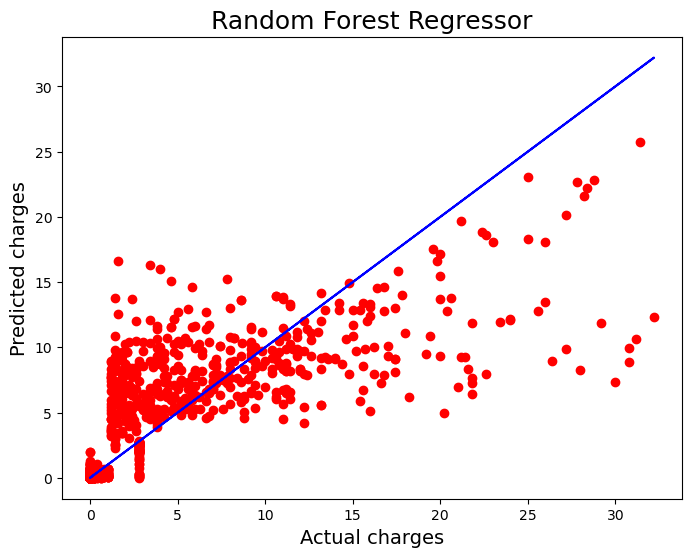

In [122]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges',fontsize= 14)
plt.ylabel('Predicted charges',fontsize= 14)
plt.title('Random Forest Regressor',fontsize= 18)
plt.show()

### Saving the Model

In [123]:
import pickle
filename = 'rainfall.pkl'
pickle.dump(knr,open(filename, 'wb'))

### Conclusion - 

Both the Problem Statements have been Solved 